# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.955, 即時現金賣出: 30.625


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [3]:
for i in range(0,19):
  currency = rate_table[i].find(name='div', attrs={'class':'visible-phone print_hide'})
  print(currency.get_text().replace(" ", ""))  # 去掉空白

  buy_rate = rate_table[i].find(name='td', attrs={'data-table':'本行現金買入'})
  sell_rate = rate_table[i].find(name='td', attrs={'data-table':'本行現金賣出'})
  print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.955, 即時現金賣出: 30.625

港幣(HKD)

即時現金買入: 3.731, 即時現金賣出: 3.935

英鎊(GBP)

即時現金買入: 38.91, 即時現金賣出: 41.03

澳幣(AUD)

即時現金買入: 20.5, 即時現金賣出: 21.28

加拿大幣(CAD)

即時現金買入: 22.56, 即時現金賣出: 23.47

新加坡幣(SGD)

即時現金買入: 21.81, 即時現金賣出: 22.72

瑞士法郎(CHF)

即時現金買入: 30.07, 即時現金賣出: 31.27

日圓(JPY)

即時現金買入: 0.2702, 即時現金賣出: 0.283

南非幣(ZAR)

即時現金買入: -, 即時現金賣出: -

瑞典幣(SEK)

即時現金買入: 2.85, 即時現金賣出: 3.37

紐元(NZD)

即時現金買入: 19.5, 即時現金賣出: 20.35

泰幣(THB)

即時現金買入: 0.882, 即時現金賣出: 1.07

菲國比索(PHP)

即時現金買入: 0.525, 即時現金賣出: 0.658

印尼幣(IDR)

即時現金買入: 0.00183, 即時現金賣出: 0.00253

歐元(EUR)

即時現金買入: 33, 即時現金賣出: 34.34

韓元(KRW)

即時現金買入: 0.02385, 即時現金賣出: 0.02775

越南盾(VND)

即時現金買入: 0.00094, 即時現金賣出: 0.00144

馬來幣(MYR)

即時現金買入: 6.19, 即時現金賣出: 7.834

人民幣(CNY)

即時現金買入: 4.222, 即時現金賣出: 4.384


## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

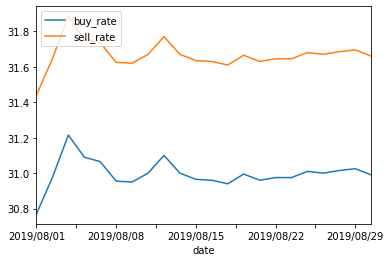

In [4]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2019-08")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

<Figure size 720x576 with 0 Axes>

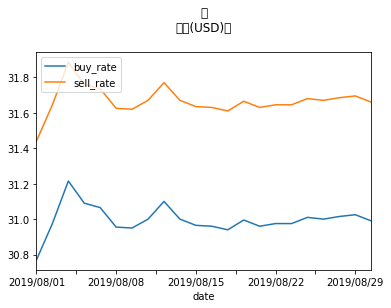

<Figure size 720x576 with 0 Axes>

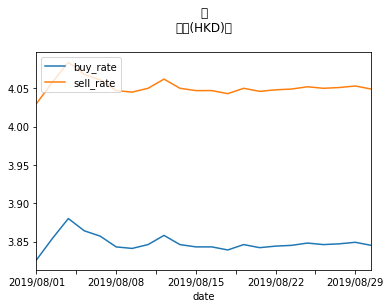

<Figure size 720x576 with 0 Axes>

43 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Anaconda3\lib\site-packages\matplotlib\textpath.py:90: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Anaconda3\lib\site-packages\matplotlib\textpath.py:203: RuntimeWarning: Glyph 21152 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
C:\Anaconda3\lib\site-packages\matplotlib\textpath.py:203: RuntimeWarning: Glyph 25343 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
C:\Anaconda3\lib\site-packages\matplotlib\textpath.py:203: RuntimeWarning: Glyph 22823 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 

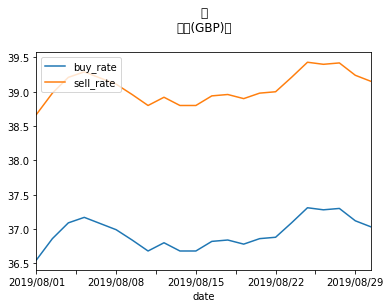

<Figure size 720x576 with 0 Axes>

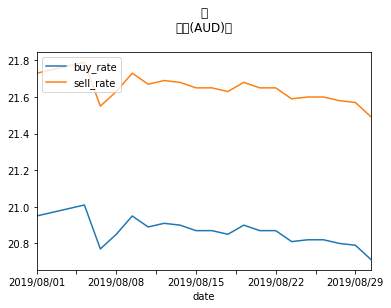

<Figure size 720x576 with 0 Axes>

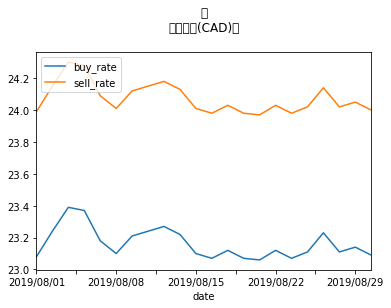

<Figure size 720x576 with 0 Axes>

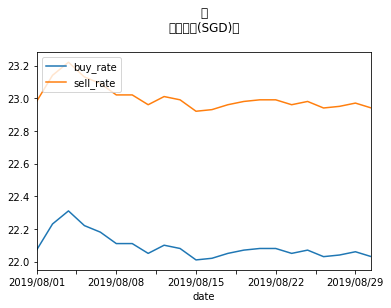

<Figure size 720x576 with 0 Axes>

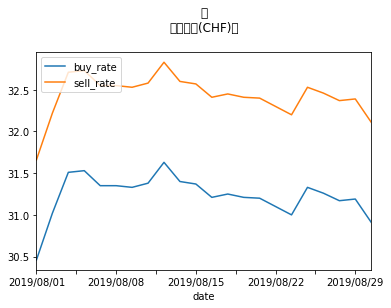

<Figure size 720x576 with 0 Axes>

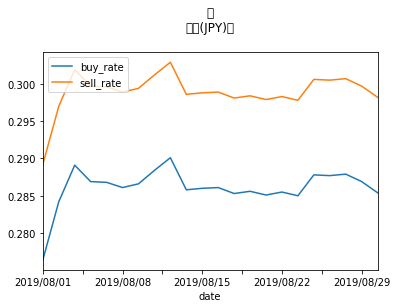

<Figure size 720x576 with 0 Axes>

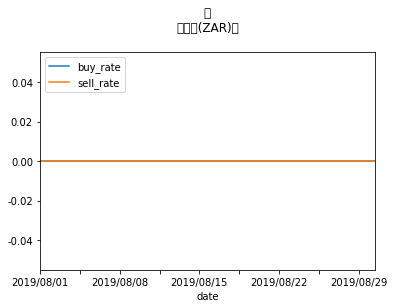

<Figure size 720x576 with 0 Axes>

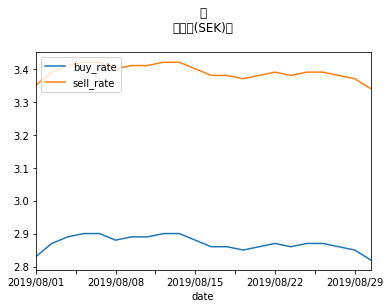

<Figure size 720x576 with 0 Axes>

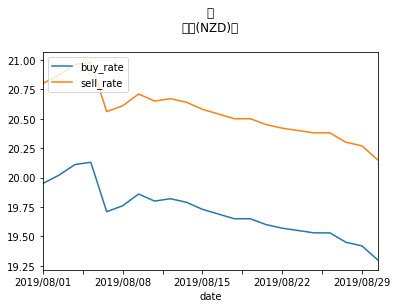

<Figure size 720x576 with 0 Axes>

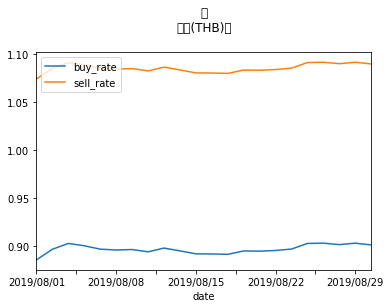

<Figure size 720x576 with 0 Axes>

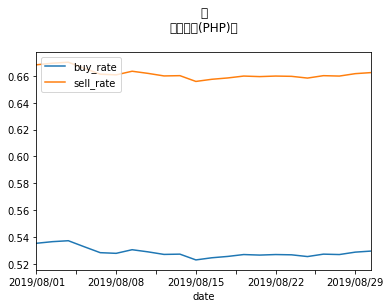

<Figure size 720x576 with 0 Axes>

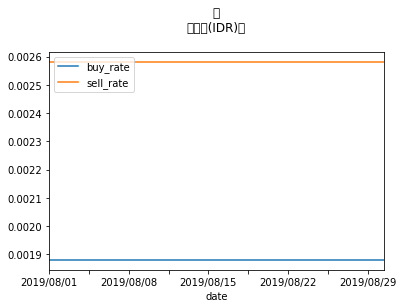

<Figure size 720x576 with 0 Axes>

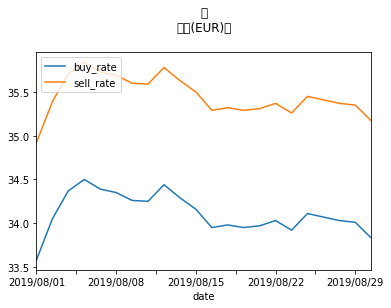

<Figure size 720x576 with 0 Axes>

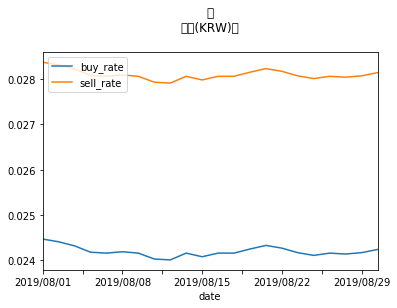

<Figure size 720x576 with 0 Axes>

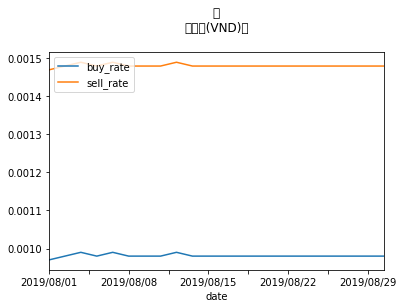

<Figure size 720x576 with 0 Axes>

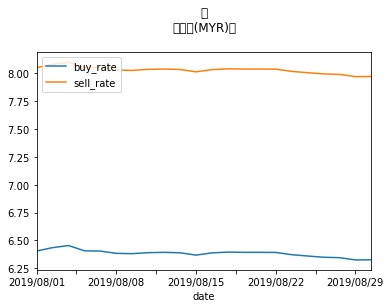

<Figure size 720x576 with 0 Axes>

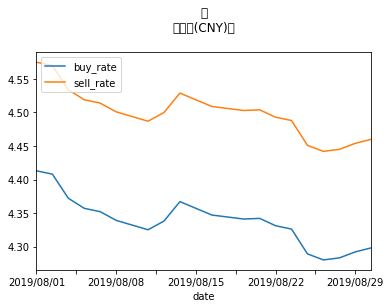

In [16]:
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
for i in range(0,19):
  # 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
  currency = rate_table[i].find(name='div', attrs={'class':'visible-phone print_hide'})

  # 針對美金，找到其「歷史匯率」的首頁 
  history_link = rate_table[i].find(name='td', attrs={'data-table':'歷史匯率'})
  history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

  #
  # 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
  #
  # 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
  quote_history_url = history_rate_link.replace("history", "quote/2019-08")
  resp = requests.get(quote_history_url)
  resp.encoding = 'utf-8'
  history = BeautifulSoup(resp.text, "lxml")
  history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

  #
  # 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
  #
  date_history = list()
  history_buy = list()
  history_sell = list()

  for history_rate in history_table:
      # 擷取日期資料
      date_string = history_rate.a.get_text()
      date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
      date_history.append(date)  # 日期歷史資料

      history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
      history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
      history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

  # 將匯率資料建成dataframe形式
  HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                      'buy_rate':history_buy,
                                      'sell_rate':history_sell})

  HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
  HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

  plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
  # 畫出歷史匯率軌跡圖 
  plt.figure(figsize=(10, 8))
  HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
  plt.legend(loc="upper left") 
  plt.title(currency.get_text().replace(" ", ""))
  plt.show()

In [18]:
import matplotlib
print(matplotlib.__file__)

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py
